# The Independent Set Boolean Function 

Consider a graph $G = \{V,E\}$, with $V = \{x_1, x_2, ..., x_n\}$ being the set of verticies $x_i$ and $E =\{x_i,x_j\}$ being the set of edges between nodes $x_i$ and $x_j$.

An "independent set" is a set, $S$, of verticies from graph $G$ such that no two verticies coincide with the same edge. This may be interpreted as a bitstring, $B$,  of the $n = |V|$ verticies in $G$, with non-negation indicating inclusion and negation indicating exclusion from the independent set. 
For a path on three verticies, $P_3$, a independent set bitstring $B$ may be  $x_0 \neg{x_1} x_2$, or $101$

So in general, a Boolean function that verifies an independent set of a graph $G$ would be: $IS(G) = \bigwedge_{x_i,x_j \in E}{\neg(x_i \land x_j)}$

Note a few things:
- IS(G) is a conjunction of NANDs, i.e an "AND of NANDs". It is a constraint where for each edge, not both veritices are allowed inclusion into the set... otherwise it would not be independent. So for a graph $G$ with edges $\{x_i,x_j\}$, $IS(G) = \neg{({x_i} \wedge x_j)} \wedge \neg{(x_{i+1} \wedge x_{j+1})} \wedge \neg{(x_{i+2} \wedge x_{j+2})} \wedge ... \wedge  \neg{(x_{n} \wedge x_{m})} $ for all edge pairs $\{x_i,x_j\}$ through $\{x_n,x_m\}$
- For an edge, it is possible for both verticies to not be included in the set. A bitstring $\neg{x_0} \neg{x_1} \neg{x_2} ... \neg{x_n}$ is the trivial independent set





# IS Boolean Translation 

Notice that by De'Morgans law: 

$IS(G) = \neg{({x_i} \wedge x_j)} \wedge \neg{(x_{i+1} \wedge x_{j+1})} \wedge \neg{(x_{i+2} \wedge x_{j+2})} \wedge ... \wedge\neg{(x_{n} \wedge x_{m})} $ 
- $ = \neg{( ({x_i} \wedge x_j) \vee (x_{i+1} \wedge x_{j+1}) \vee (x_{i+2} \wedge x_{j+2}) \vee ... \vee (x_{n} \wedge x_{m}))}$

For notational simplicitly let $e_{i,j} = ( x_i \wedge x_j)$, for all edge pairs in G.
We can then rewrite $IS(G)$ as: 
- $IS(G) = \neg{( e_{i,j} \vee e_{i+1,j+1} \vee e_{i+2,j+2} \vee ... \vee e_{n,m} )}$

The reader can verify via truth tables or otherwise that: 

- $a \vee b = (a \wedge \neg{b}) \oplus b$, where $\oplus$ is the logical XOR, i.e, addition mod 2. 

By applying this transformation to the first two terms, we see that: 

- $IS(G) = \neg{((e_{i,j} \wedge \neg{e_{i+1,j+1}}) \oplus e_{i+1,j+1} \vee e_{i+2,j+2} \vee ... \vee e_{n,m}}$

Applying it again with $a = (e_{i,j} \wedge \neg{e_{i+1,j+1}})$ and $b = e_{i+2,j+2}$ yeilds: 

- $IS(G) = \neg{(( ((e_{i,j} \wedge \neg{e_{i+1,j+1}}) \oplus e_{i+1,j+1}) \wedge \neg{e_{i+2,j+2}}) \oplus e_{i+2,j+2} \vee ... \vee e_{n,m})}$


It should be noted that the logical $\wedge$ distributes over the logical $\oplus$, i.e $a \wedge ( b \oplus c) = (a \wedge b) \oplus (a \wedge c)$. And of course, the associativity of $\wedge$ and $\vee$ within their respective operations is valuable.
Distributing in $IS(G)$ and applying the OR to XOR transformation, it is observed inductively that: 

- $IS(G) = \neg{((((e_{i,j} \wedge \neg{e_{i+1,j+1}} \wedge \neg{e_{i+2,j+2}}) \oplus (e_{i+1,j+1} \wedge \neg{e_{i+2, j+2}}) \oplus {e_{i+2,j+2}} } \vee ... \vee e_{n,m}$

And more generally:

- <b>(1)</b>$IS(G) = \neg{((e_{i,j} \wedge \neg{e_{i+1, j+1}} \wedge \neg{e_{i+2,j+2}} \wedge \neg{e_{i+3,j+3}} \wedge ... \wedge \neg{{e_{n, m}}}) \oplus (e_{i+1,j+1} \wedge \neg{e_{i+2,j+2}} \wedge \neg{e_{i+3,j+3}} \wedge ... \wedge \neg{e_{n,m}}) \oplus ... \oplus (e_{n-1,m-1} \wedge \neg{e_{n,m}}) \oplus e_{n,m})}$

where, again, $e_{i,j}$ is the conjunction $(x_i \wedge x_j)$ for all $i \leq n, j \leq m$. 

To reiterate: $x_i$ and $x_j$ are Boolean variables that equal 1 if vertex $x_i$ or $x_j$ are in the proposed "independent set" equaling 1 in in the bitstring $B$ and 0 if not.

# In Code

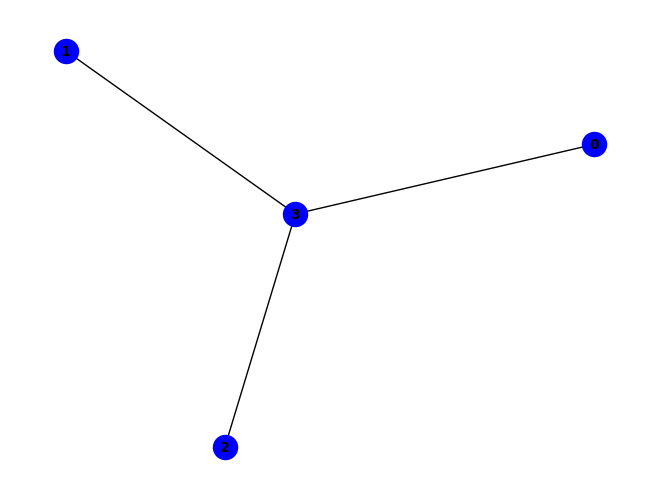

~((c & d) ^ (b & d & ~c) ^ (a & d & ~b & ~c))
test for AND NAND equivalent: PASS


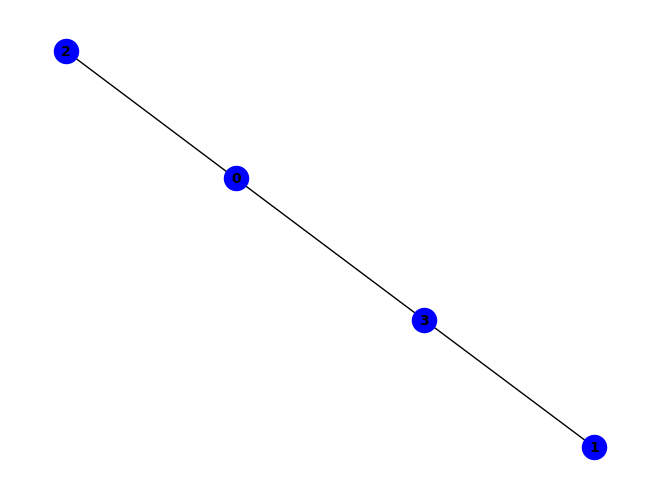

~((b & d) ^ (a & c & ~d) ^ (a & d & ~b))
test for AND NAND equivalent: PASS


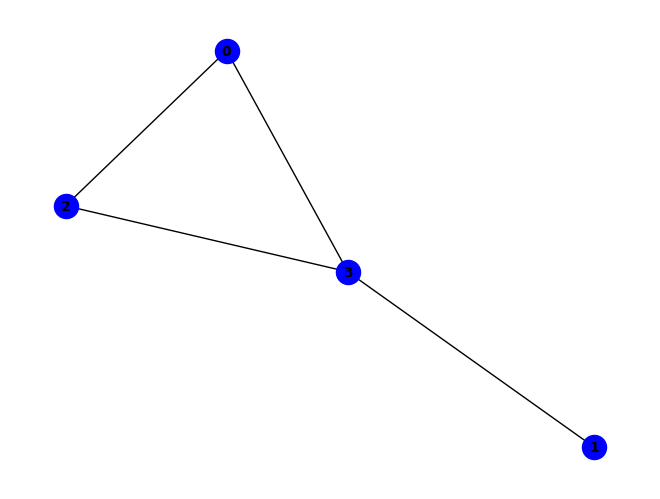

~((c & d) ^ (a & c & ~d) ^ (b & d & ~c) ^ (a & d & ~b & ~c))
test for AND NAND equivalent: PASS


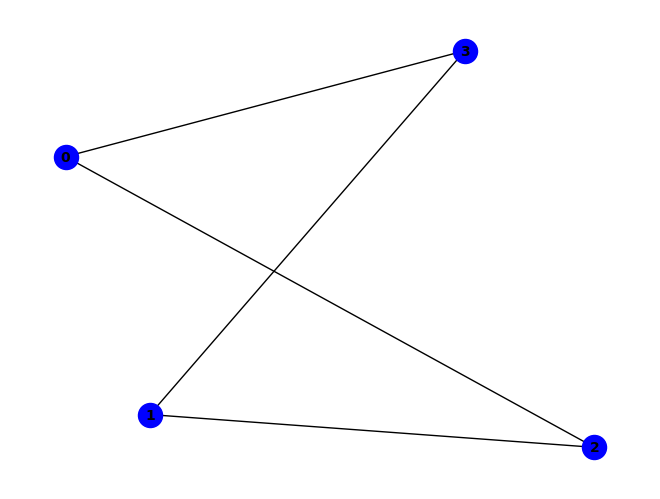

~((b & d) ^ (a & d & ~b) ^ (b & c & ~d) ^ (a & c & ~b & ~d))
test for AND NAND equivalent: PASS


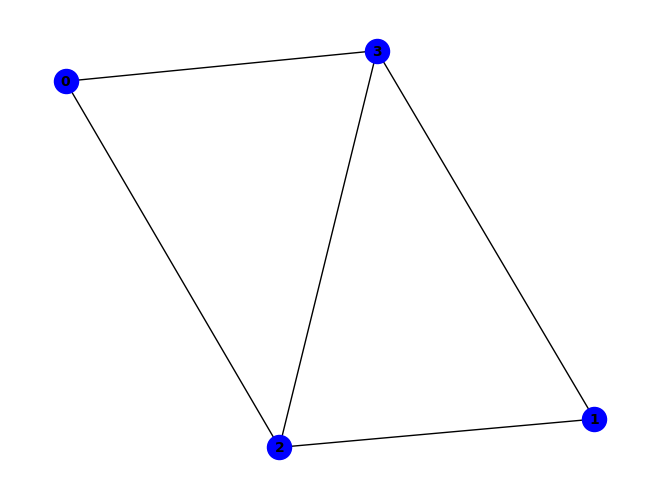

~((c & d) ^ (b & c & ~d) ^ (b & d & ~c) ^ (a & c & ~b & ~d) ^ (a & d & ~b & ~c))
test for AND NAND equivalent: PASS
AVG EDGE TO XOR TERM PER GRAPH: 1.0


In [1]:
from oracle import GraphGenerator, BooleanInstance
import sympy as sp
from sympy.abc import a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s
symbolsAvail = [a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s]
t = {'a': a, 'b': b, 'c': c, 'd': d, 'e': e, 'f': f, 'g': g, 'h': h, 'i': i, 'j': j, 'k': k, 'l': l, 'm': m, 'n':n, 'o':o,'p':p,'q':q,'r':r,'s':s}
#translation from char to sympy var ^^ 
ratios = [] #for measuring xor to edge ratio

k = 4 # CHOOSE NUMBER OF NODES



##this function takes in # of nodes and # of graphs wanted, and constructs an ESOP for the MIS of that graph 
def EsopAlt_test(nodes, numGraphs):
    graphGetter = GraphGenerator()
    graphArray = graphGetter.createKgraphs(nodes)      # get graph array
    
    for graphNumber in range(numGraphs):
        chosenGraph = graphGetter.chooseGraph(graphNumber)
        #graphGetter.printGraph()
        numEdges = len(chosenGraph.edges())
        symbolUse = []
        edgeConj = []
        XorTerms = []                ##used for parsing
        replacements = {}
        originalMIS = []
        
        for vertex in chosenGraph.nodes():        ## create symy symbol array 
            symbolUse.append(symbolsAvail[vertex])

        for edge in chosenGraph.edges():
            edgeConj.append((symbolUse[edge[0]] & symbolUse[edge[1]]))  # start with first positive edge (e_0)
            originalMIS.append(sp.Not((symbolUse[edge[0]]) & (symbolUse[edge[1]]))) # also establish the original eq
        originalMIS = sp.And(*originalMIS)

        ## create ( (e_0,1 & ~e_1,2 & ~e_2,3...) XOR (e_1,2 & ~e_2,3 & ...) XOR ... XOR (e_n,m)   (1)
        for i in range(len(edgeConj)):
            j = i + 1
            bigConj = edgeConj[i]
            while(j < len(edgeConj)):           #establish (1) as shown in above document
                neg = sp.Not(edgeConj[j])   
                bigConj = bigConj & neg
                j+=1
            bigConj = sp.logic.boolalg.simplify_logic(bigConj)  #reduce conjugations if possible
            
            
            ## now to deal with any lingering OR terms i.e a & ~b & (~e | ~f) ... 
            ##using conversion to string and parsing bc easier...
            
            prods = []
            numBinomials = 0
            polys = [] # for collecting OR terms after conversion 
            trigger = 0  #"trigger" used to flag when OR terms are reached in the string 
            initTerm = str(bigConj)
            if '|' in initTerm:  ##if lingering OR term(s)
                for i in range(len(initTerm)):
                    if(initTerm[i] == '('):
                        trigger = 1
                    if(trigger == 0):
                        if(initTerm[i].isalpha()):
                            if(initTerm[i-1] == '~'):
                                prods.append(sp.Not(t[initTerm[i]]))   #if not up to the or terms, collect outside ANDS
                            else:
                                prods.append(t[initTerm[i]])
                            
                    if (initTerm[i]) == '|': #when reaching an OR, apply a~b ^ b transformation again
                        numBinomials+=1
                        firstVar = initTerm[i-2]
                        secondVar = initTerm[i+3]
                        polys.append(( sp.Xor(sp.And(sp.Not(t[firstVar]), (t[secondVar])), sp.Not(t[secondVar])))) #since we know all naands are negated nors
                trigger = 0
                
                #now,, the extra OR terms have been translated to XOR and AND. i.e:
                # a & ~b & (~e | ~f) & (~g | ~h) = a & ~b & ((~e & f) ^ f) & ((~g & h) ^ ~h)
    
                #multiply out the XOR terms using polynomial multiplication
                multOut = sp.logic.boolalg.distribute_xor_over_and(sp.And(*polys)) 
                polys = [] 
                
                finalXors = []
                finalProds = []
                
                #now to distribute those outside ANDs
                stringMultOut = str(multOut)
                ## deal with constant single first var for simplicity if present 
                #print(stringMultOut)
                j = 0
                if(stringMultOut[0] == '~'):
                    finalProds.append(sp.Not(t[stringMultOut[1]]))
                    for var in prods:
                        finalProds.append(var) #distr. to first var
                    finalXors.append(sp.logic.boolalg.simplify_logic(sp.And(*finalProds)))
                    j+=4
                
                finalProds = []
                
                for i in range(j,len(stringMultOut)):
                    if(stringMultOut[i].isalpha()):
                        if(stringMultOut[i-1] == '~'):
                            finalProds.append(sp.Not(t[stringMultOut[i]]))
                            i+=1
                        else:
                            finalProds.append(t[stringMultOut[i]])
                            
                    elif( (stringMultOut[i] == '^') or (i == (len(stringMultOut) - 1)) ):
                        for vari in prods:
                            finalProds.append(vari)
                        finalXors.append(sp.logic.boolalg.simplify_logic(sp.And(*finalProds)))
                        #print(f"final prods: {finalProds}")
                        finalProds = []
                replacementTerm = str(sp.Xor(*finalXors))
                #print(f"replace {bigConj} -> {replacementTerm}")
                replacements["(" + str(bigConj) + ")"] = replacementTerm
                
            XorTerms.append(bigConj)
            #print(bigConj)
        finalEsop = sp.Xor(*XorTerms)
        finalFr = sp.Not(finalEsop)
        #finalFr = finalEsop
        graphGetter.printGraph()
        if '|' in str(finalFr):  #resympyfy the final string for truth table
            finalFrS = str(finalFr)
            for rep in replacements:
                finalFrS = finalFrS.replace(rep, replacements[rep])
                
            conjTerms = []
            xorConj = [] 
            #print(finalFrS)
            for i in range(1,len(finalFrS)):
                if ((finalFrS[i] == '^') or ((i == len(finalFrS) - 1)  )):       ##convert string back into Sympy 
                    xorConj.append(sp.And(*conjTerms))
                    conjTerms = []
                elif(finalFrS[i].isalpha()):
                    if(finalFrS[i-1] == '~'):
                        conjTerms.append(sp.Not(t[finalFrS[i]]))
                    else:
                        conjTerms.append((t[finalFrS[i]]))
            distroEsop = sp.Xor(*xorConj)
            finalFr = sp.Not(distroEsop)
            #finalFr = distroEsop
        #get the ratio of xor terms per edge in this graph
        ratios.append( (str(finalFr).count("^") + 1) / len(chosenGraph.edges()))
        print(finalFr)
        table1 = sp.logic.boolalg.truth_table(originalMIS, symbolsAvail[0:len(chosenGraph.nodes())])
        table2 = sp.logic.boolalg.truth_table(finalFr, symbolsAvail[0:len(chosenGraph.nodes())])
        comp1 = []
        comp2 = []
        for t1 in table1:
            comp1.append((t1))                    ## compare equivalence of original MIS AND of NAANDs with new ESOP
        for t2 in table2:
            comp2.append((t2))
        if comp1 == comp2:
            print("test for AND NAND equivalent: PASS")
        else:
            print("test for AND NAND equivalent: FAIL****")
        comp1 = []
        comp2 = []
        originalMIS = []
        #print(f"{nodes} nodes, {len(chosenGraph.edges)} edges, *{len(XorTerms)}* TERMS")
    
    
    # calc edge to xor ratio
    finalRatio = 0
    for rat in ratios:
        finalRatio += rat
    finalRatio/= numGraphs
    print(f"AVG EDGE TO XOR TERM PER GRAPH: {finalRatio}")
    #end function
    
    
EsopAlt_test(k,5 )


# Implementation in QSOP Pipeline

In [2]:
from sympy_esop_to_qcirc_t import ESOPQuantumCircuit
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Operator
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
import qiskit_aer as Aer
#from networkx_to_feasible_sols import *
from oracle_and_gm_qaoa import *

numNodes = 6
generator = GraphGenerator()
graphingArray = generator.createKgraphs(numNodes)

graphNum = 40 #arbitrary graph chosen 
testGraph = graphingArray[graphNum]
generator.chooseGraph(graphNum)

testInst = BooleanInstance("MIS", testGraph)
testESOP = testInst.getProbESOP()

#qc = ESOPQuantumCircuit (testESOP, symbolsAvail[:numNodes])

#print(Operator.from_circuit(qc))


(e & f) ^ (c & e & ~f) ^ (c & f & ~e) ^ (a & d & ~e & ~f) ^ (b & e & ~c & ~f) ^ (b & f & ~c & ~e) ^ (a & e & ~b & ~c & ~f) ^ (a & f & ~b & ~c & ~e)
Exclusive Sum of Products (ESOP): (e & f) ^ (c & e & ~f) ^ (c & f & ~e) ^ (a & d & ~e & ~f) ^ (b & e & ~c & ~f) ^ (b & f & ~c & ~e) ^ (a & e & ~b & ~c & ~f) ^ (a & f & ~b & ~c & ~e)
Transpiled Quantum Circuit:
7
Transpiled circuit depth: 8
Transpiled circuit gates: 24
                                                                           »
q_0: ────────────────────────────────■─────────────────────────────■───────»
                                     │                      ┌───┐  │       »
q_1: ────────────────────────────────┼─────────■─────────■──┤ X ├──■───────»
                              ┌───┐  │         │         │  └───┘  │       »
q_2: ────────────■─────────■──┤ X ├──┼─────────■─────────■─────────■───────»
                 │         │  └───┘  │         │         │         │       »
q_3: ────────────┼─────────┼─────────■──────

QiskitError: 'Invalid input data format for Operator'

# Implement BHT to run qaoa

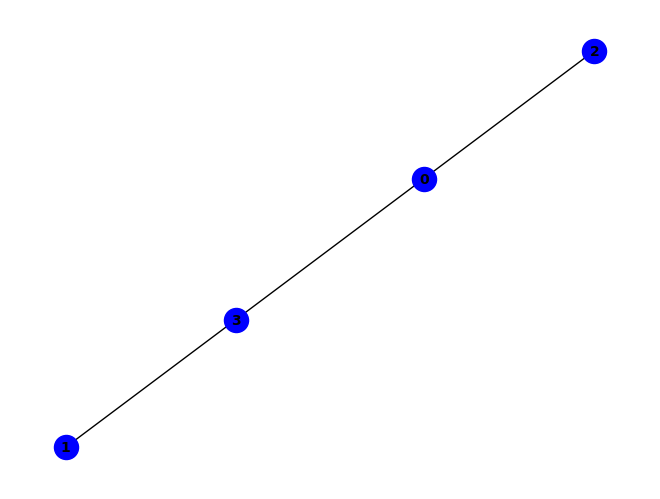

(b & d) ^ (a & c & ~d) ^ (a & d & ~b)
2.0*I**3 - 2.0*I**2*a + 1.0*I**2*b - 1.0*I**2*c - 1.0*I*a*b + 1.0*I*a*c - 1.0*I*b*d - 1.0*I*c*d + 1.0*a*b*d + 1.0*a*c*d + 0.5*a + 2.0*b*d - 1.5*b + 0.5*c - 1.5*d
[[0.0], ['-1.5a', '-0.5b', '-0.5c', '-1.5d'], ['-1.0ab', '1.0ac', '1.0bd', '-1.0cd'], ['1.0abd', '1.0acd']]
2.0*I**3 - 2.0*I**2*a + 1.0*I**2*b - 1.0*I**2*c - 1.0*I*a*b + 1.0*I*a*c - 1.0*I*b*d - 1.0*I*c*d + 1.0*a*b*d + 1.0*a*c*d + 0.5*a + 2.0*b*d - 1.5*b + 0.5*c - 1.5*d
[[0.0], ['-1.5a', '-0.5b', '-0.5c', '-1.5d'], ['-1.0ab', '1.0ac', '1.0bd', '-1.0cd'], ['1.0abd', '1.0acd']]
2.0*I**3 - 2.0*I**2*a + 1.0*I**2*b - 1.0*I**2*c - 1.0*I*a*b + 1.0*I*a*c - 1.0*I*b*d - 1.0*I*c*d + 1.0*a*b*d + 1.0*a*c*d + 0.5*a + 2.0*b*d - 1.5*b + 0.5*c - 1.5*d
[[0.0], ['-1.5a', '-0.5b', '-0.5c', '-1.5d'], ['-1.0ab', '1.0ac', '1.0bd', '-1.0cd'], ['1.0abd', '1.0acd']]
2.0*I**3 - 2.0*I**2*a + 1.0*I**2*b - 1.0*I**2*c - 1.0*I*a*b + 1.0*I*a*c - 1.0*I*b*d - 1.0*I*c*d + 1.0*a*b*d + 1.0*a*c*d + 0.5*a + 2.0*b*d - 1.5*b + 0.5*

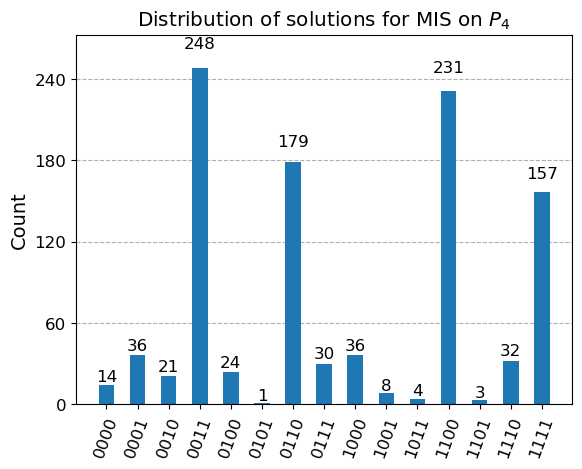

In [109]:
from oracle import GraphGenerator, BooleanInstance
import sympy as sp
import numpy as np
from scipy.optimize import minimize
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.quantum_info import Pauli
 #casual imports yknow 
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Operator
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
import qiskit_aer as Aer
#from networkx_to_feasible_sols import *
import matplotlib.pyplot as plt
from sympy.abc import a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s
symbolsAvail = [a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s]
#t = {'a': a, 'b': b, 'c': c, 'd': d, 'e': e, 'f': f, 'g': g, 'h': h, 'i': i, 'j': j, 'k': k, 'l': l, 'm': m, 'n':n, 'o':o,'p':p,'q':q,'r':r,'s':s}

def ESOPtoQAOA(params,pval,graph,esop): #uses BHT method for converting ESOP to Hc...
    esop = str(esop) + "00000"   #pad dat thang 
    Hc = 0
    Hgs = []
    j = 0
    largest = 0
    for i in range(esop.count('^') + 1 ):
        currConj = []
        while(esop[j] != '^'):                             
            if(esop[j] == '~'):
                currConj.append(-sp.Symbol(esop[j+1]))     #process ESOP product by product, using them more like nums now
                j+=2                                       # ~a --> -a
            elif(esop[j].isalpha()):
                currConj.append(sp.Symbol(esop[j]))
                j+=1
            elif(esop[j] == '0'):
                break
                
            else:
                j+=1
        #print(currConj)
        j+=1
        
        
        conjLen = len(currConj)
        if(conjLen > largest):        #keep track of prod (conj...) length
            largest = conjLen
            
        if(conjLen >= 3):
                thisPoly = sp.Symbol("I") - currConj[0]               ## binomials for C^nZ
                k = 1
                while(k < conjLen):
                    if(k % 2 == 1):
                        thisPoly*= currConj[k] - sp.Symbol("I")      ## inversion for parity
                    else:
                        thisPoly*=sp.Symbol("I") - currConj[k]
                    k+=1
                thisPoly*= (1 / (2**conjLen))                         
                Hgs.append(thisPoly)
                #print(thisPoly)
        elif(conjLen == 2):
            thisPoly = (-1/4)*sp.Symbol("I") + (1/4)*(currConj[0] + currConj[1] - (currConj[0]*currConj[1]))
            Hgs.append(thisPoly)               #CZ
            #print(thisPoly)
        else:
            thisPoly = (-1/2)*sp.Symbol("I") + (1/2)*conj
            Hgs.append(thisPoly)      #Z
            #print(thisPoly)
    
    
    for term in Hgs:
        Hc+=term
        #Hc*= -1
    Hc*=-8  ##changed to 2 * v
    for node in graph.nodes():
        Hc-=(1/2)*(sp.Symbol("I")) - (1/2)*symbolsAvail[node]
    Hc = str(sp.expand(Hc))     ##add these components up to sum for Hc
    print(Hc)
    
    """" 
    its great up to here, where Hc is formed. However, one might notice that the format of Hc is a bit horrendous, and the MCZ Polynomials grow 2^n
    what I tried to do was reformat it... but it gets stuck for some... will fix
    also implemented combining like terms so the final is pretty
    
    idea... split on + and -, then sort individually 
    
    
    """
    
    
    cleanUpBins = []
    l = 0
    while(l <= largest):
        cleanUpBins.append([])
        l+=1
    
    #split by + or -  
    currInx = 0
    plus = 0
    minus = 0
    nextPt = 0
    spare = Hc
    while(1):
        if(spare[0] != '+' and spare[0] != '-'):
            thisSign = '+'
        else:
            thisSign = spare[0]
            spare = spare[1:]
        plus = spare.find("+")
        minus = spare.find("-")
        if(plus + minus == -2):
            cleanTerm = (thisSign + spare[1:])
            if(cleanTerm.find("*") != -1):
                tempor = ""
                for j in range(len(cleanTerm)):
                    if(cleanTerm[j] != '*'):
                        tempor+=cleanTerm[j]
                cleanTerm = tempor
            n = 0
            for char in cleanTerm:
                if char.isalpha():
                    n+=1
            
            cleanUpBins[n].append(cleanTerm)
            break
        elif((plus == -1) ^ (minus == -1 )):
            nextPt = max(plus,minus)
        else:
            nextPt = min(plus,minus)
        currTerm = thisSign + spare[1:nextPt]
        #print(currTerm)
        spare = spare[nextPt:]
        cleanTerm = ""
        j = len(currTerm) - 1
        coeffLen = currTerm.find("*")
        thisCoeff = currTerm[:coeffLen]
        cleanTerm += thisCoeff
        rev = ""
        numZs = 0
        while( ((not (currTerm[j].isdigit())) and (not (currTerm[j] == 'I') ))):
            if(currTerm[j].isalpha()):
                numZs+=1
                rev+=currTerm[j]
            j-=1
        #print(rev[::-1])
        cleanTerm += rev[::-1]
        
        if(cleanTerm.find("*") != -1):
            tempor = ""
            for j in range(len(cleanTerm)):
                if(cleanTerm[j] != '*'):
                    tempor+=cleanTerm[j]
            cleanTerm = tempor
                    
        #print(cleanTerm)
        cleanUpBins[numZs].append(cleanTerm)
              
              
        #currTerm+=Hc[min(plus,minus)]
    
    
    zeroSum = 0
    for num in cleanUpBins[0]:
        zeroSum+=float(num)
    cleanUpBins[0].clear()
    cleanUpBins[0].append(zeroSum)
    
    
    #print('\n')
    #print(cleanUpBins)
            #if(item[j].isalpha())
    index = 0
    for abin in cleanUpBins:
        #print(abin)
        if(len(abin) <= 1):
            pass
        else:
            endingDict = {}
            for i in range(len(abin)):
                thisOp = abin[i]
                thisEnding = thisOp[-index:]
                #print(f"{thisOp[:-index]} is from {thisOp}")
                if(thisEnding in endingDict):
                    prev = float(endingDict[thisEnding])
                    curr = float(thisOp[:-index])
                    endingDict[thisEnding] = prev + curr
                else:
                    endingDict[thisEnding] = float(thisOp[:-index])
            abin.clear()
            for entry in endingDict:
                abin.append(str(endingDict[entry]) + str(entry))
        index+=1

    
    #cleanUpBins[0].append(Hc)
    print(cleanUpBins)
    return cleanUpBins
    

def rz_n(qCirc, angle, offset, qbits):
    target = qbits[-1]  
    for l in range(len(qbits) - 1):
        qCirc.cx(qbits[l], target)
        
    qCirc.rz(offset*angle, target)
    
    for m in reversed(range(len(qbits) - 1)):
        qCirc.cx(qbits[m], target)


def createQAOACirc(params, pval, graph, thisEsop):
    fullQAOA = QuantumCircuit(len(graph.nodes()))
    fullQAOA.h(range(len(graph.nodes())))
    
    zH = ESOPtoQAOA(params, pval, testGraph, thisEsop )
    for i in range(pval):
        for k in range(1,len(zH)):
            for l in range(len(zH[k])):
                thisZs = zH[k][l]
                rz_n(fullQAOA, params[i], 2 * float(thisZs[:-k]), [symbolsAvail.index(sp.Symbol(char)) for char in thisZs[-k:]])
        for qubit in range(numNodes):
            fullQAOA.rx(2.0 * params[i + pval],qubit)
    fullQAOA.measure_all()
    return [fullQAOA,zH]

def runCircuit(qcirc):
    backend = Aer.AerSimulator()
    counts = backend.run(qcirc, shots = 1024).result().get_counts()
    return counts

#sum over all verticies in graph
#get diag mtx
def MISobj(strSol, graph):
    strSol = strSol[::-1]
    obj = 0
    for char in strSol:
        obj-=int(char)
    q = 0
    for edge in graph.edges():
        if(int(strSol[edge[0]]) and int(strSol[edge[1]])):
            q+= 1
    return obj+q

def compExp(counts, graph):
    avg = 0
    countSum = 0
    for stringy,count in counts.items():    #calculates expected value of Hc?
        objective = MISobj(stringy, graph)
        avg += objective * count
        countSum+= count
    return (avg / countSum)
    
def get_expect(graph, pList, pvalue, ESOP):
    lmao = pList
    lmaoEsop = ESOP
    def execute_it(lmao):
        thisCirc = (createQAOACirc(lmao, pvalue, graph, lmaoEsop))[0]
        #print(thisCirc)
        thisCounts = runCircuit(thisCirc)
        
        return compExp(thisCounts, graph)
    
    return execute_it


                                

numNodes = 4
generator = GraphGenerator()
graphingArray = generator.createKgraphs(numNodes)

graphNum = 1  #arbitrary graph chosen 
testGraph =graphingArray[graphNum]


generator.chooseGraph(graphNum)
generator.printGraph()
testInst = BooleanInstance("MIS", testGraph)
testESOP = testInst.getProbESOP()
                                
p = 1
pars = np.random.rand(2*p)
expectation = get_expect(testGraph, pars, p,testESOP)
top = 20

res = minimize(expectation, pars, method = 'COBYLA')

circAndC = (createQAOACirc(res.x,p, testGraph, testESOP))
finalCirc = circAndC[0]
#print(finalCirc)
backendFinal = Aer.AerSimulator()
countsFinal = backendFinal.run(finalCirc,shots = 1024).result().get_counts()
print(circAndC[1])
print(countsFinal) 
print(compExp(countsFinal, testGraph))
print(compExp(countsFinal, testGraph) / -2)
plt.rcParams.update({'font.size': 12})
plot_histogram(countsFinal, title = 'Distribution of solutions for MIS on $P_4$')


#approx ratio is <gamma,beta| COST HAMILT | gamma,beta >  OVER MAX VAL IN C
